# ScientISST SBE workshop
Welcome to the **ScientISST workshop "Introduction to Signal Acquisition"**. 

Here you'll find useful code to perform an ECG acquisition on yourself and process it. 

## Task 1 - Getting started

### 1. Turn on your ScientISST device

Connect a battery and turn on the device until the white LED blinks

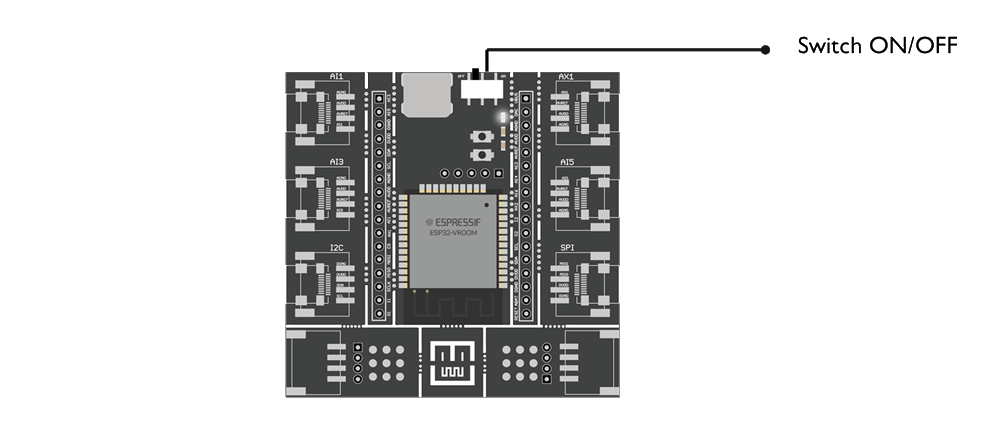

Enable Bluetooth on your computer and connect to "ScientISST-XX-XX" where XX-XX is the tag of your device.

### 2. Find your PORT 

Depending on your OS, you need to find a given String, which is the unique address of your ScientISST device.

#### Windows

Go to Control Panel > Hardware and Sound > Devices and Printers. 

Select "Add a device". Select the ScientISST Sense board, hit "next" until its set up.

While connected to the board, search "Bluetooth settings" on the Control Panel, then go to the "COM ports" tab and check the port name for the **outgoing** entry. 

Copy the String like: ```COMX```

#### Mac

First, you need to pair the ScientISST sense device in the Bluetooth Settings section. Then, you'll need to find the serial port address using the Terminal:


```batch
ls /dev/tty.ScientISST*
```

Copy the String like: ```/dev/tty.ScientISST-XX-XX-SPP_SE```



#### Linux

Open the terminal and run:

```batch
bluetoothctl
scan on
pair XX:XX:XX:XX:XX
trust XX:XX:XX:XX:XX
```

Copy the String like ```XX:XX:XX:XX:XX```


### 3. Start a simple acquisition

After that, you can this below:
```
%run sense.py
```

Did it work right away? Check the arguments above. What does it say?

Hint: try appending the PORT name after "sense.py"

You should now see a list of variables that keep growing! 

The default acquisition duration (argument **-d**) is unlimited, so the acquisition won't stop unless you stop the script (or turn the device off).

Now, try running it for a couple of seconds below:
```
%run sense.py <PORT name> -d 5
```

### 4. Live plot

It would be helpful if we could see the variables being plotted in real time right?

We can send the data through a layer called **Lab Streaming Layer**, which will connect the Scientisst API to a live plot. This will require opening a live plotter outside jupyter.



First, open a new Anaconda Prompt (windows) or the terminal (mac) and activate your environment:
```
conda activate <your environment name>
```

(don't close the terminal)

Now:
1. Plug your sensor to the ScientISST **side conector**
2. Connect **standard pre-gelled ECG electrodes to the sensor**. 

To see your signal, you need to run the sense script again. Since we're using just one channel, we just need to enable that corresponding channel.

Which Analog Channel is your sensor connected to?

Run the following for 60 seconds:
```
%run sense.py <PORT name> -d 60 -s --channels x -r
```
where "x" is the number of the Analog Channel AIx.


Once you see **"Connected!"**, go back to the Anaconda Prompt (windows) or the terminal (mac) and run:
```
python -m pylsl.examples.ReceiveAndPlot
```

Do you see your live ECG?

## Task 2 - Sampling frequency

What happens if we decrease the sampling frequency?

Try an ECG acquisition at a sampling frequency of 10Hz
```
%run sense.py <PORT name> -d 60 -s --channels x -r -f 10
```

Can you still see the R peaks?

## Task 3 - Invisible electrodes

**Disconnect the standard pre-gelled ECG electrodes** from the sensor and **connect the textile electrodes**. 

Now, **while touching the textile electrodes**, try running:
```
%run sense.py <PORT name> -d 60 -s --channels x -r
```

Once you see **"Connected!"**, go back to the Anaconda Prompt (windows) or the terminal (mac) and run:
```
python -m pylsl.examples.ReceiveAndPlot
```

Does the signal look the same?

## Task 4 - BiosPPy

Now, **while touching the textile electrodes**, run:
```
%run sense.py <PORT name> -d 60 -s --channels x -r --output "output.txt"
```
Wait for it to finish.

BioSSPY features' part

## Troubleshooting

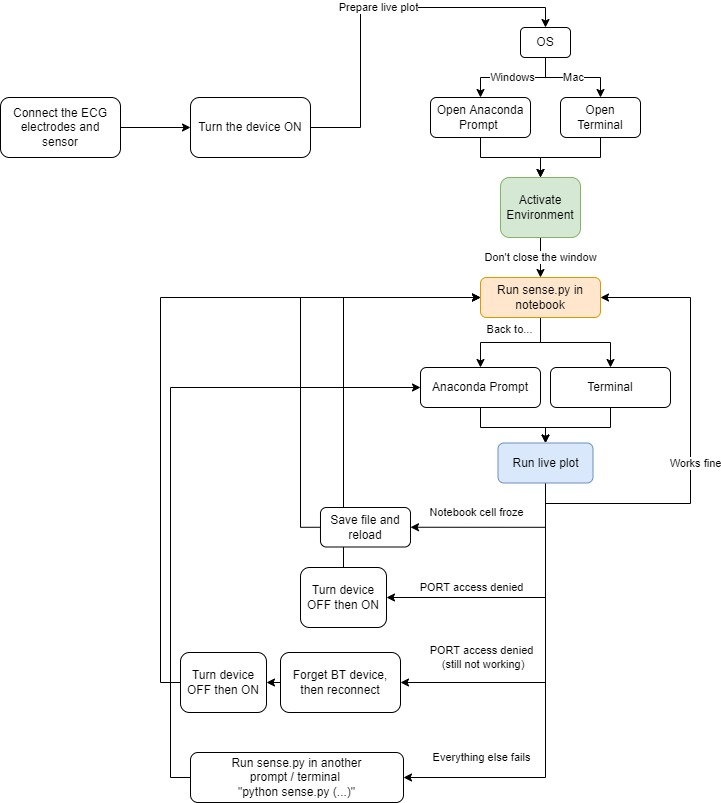